In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('bigdatamart_Train.csv')
df=pd.read_csv('bigdatamart_Test.csv')

In [3]:
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
# To concat both columns
dc=pd.concat([dt,df],ignore_index=True)

In [6]:
# Display the shape of the train dataset
print ('The shape of the dataset is', dt.shape)

The shape of the dataset is (8523, 12)


In [7]:
# Display the shape of the test dataset
print ('The shape of the dataset is', df.shape)

The shape of the dataset is (5681, 11)


In [8]:
# Dataframe columns
print ('Number of columns in train dataset :',dt.columns)
print ('*'*100)
print ('Number of columns in test dataset :',df.columns)

Number of columns in train dataset : Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
****************************************************************************************************
Number of columns in test dataset : Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [9]:
# Getting information on the datasets
print (dt.info())
print ('-'*100)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
----------------------------------------

In [10]:
# To find the data type of the dataset
for col in dt:
    print ('This train dataset column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)
print ('-*'*125)
for col in df:
    print ('This test dataset column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This train dataset column Item_Identifier has ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] unique elements
****************************************************************************************************
This train dataset column Item_Weight has [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11

In [11]:
# To find the no.of unique data type of the dataset
for col in dt:
    print ('This train dataset column', col ,'has', dt[col].nunique(),'unique elements')
    print ('*'*100)
print ('-*'*127)
for col in df:
    print ('This test dataset column', col ,'has', dt[col].nunique(),'unique elements')
    print ('*'*100)

This train dataset column Item_Identifier has 1559 unique elements
****************************************************************************************************
This train dataset column Item_Weight has 415 unique elements
****************************************************************************************************
This train dataset column Item_Fat_Content has 5 unique elements
****************************************************************************************************
This train dataset column Item_Visibility has 7880 unique elements
****************************************************************************************************
This train dataset column Item_Type has 16 unique elements
****************************************************************************************************
This train dataset column Item_MRP has 5938 unique elements
****************************************************************************************************
This train dat

In [12]:
# Getting information on NAN in both the datasets
print (dt.isna().sum())
print ('-*'*50)
print (df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [13]:
# Find out the mode for the whole dataset
dc['Outlet_Size'].mode()[0]

'Medium'

In [14]:
# replacing mode in the both the dataset
dt['Outlet_Size'].fillna(dc['Outlet_Size'].mode()[0], inplace=True)
df['Outlet_Size'].fillna(dc['Outlet_Size'].mode()[0], inplace=True)
dc['Outlet_Size'].fillna(dc['Outlet_Size'].mode()[0], inplace=True)

In [15]:
# Seeing the nan values in total data set
dc.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [16]:
# Treating the Age column of the dataset
def impute_nan(dc,var,med):
    dc[var+"_median"]=dc[var].fillna(med)
    dc[var+"_random"]=dc[var]
    ##It will have the random sample to fill the na
    random_sample=dc[var].dropna().sample(dc[var].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=dc[dc[var].isnull()].index
    dc.loc[dc[var].isnull(),var+'_random']=random_sample

In [17]:
# Median of the age is calculated
med=dc.Item_Weight.median()

In [18]:
# Imputation
impute_nan(dc,"Item_Weight",med)

In [19]:
dc

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_median,Item_Weight_random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,10.50,10.50
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,7.60,7.60
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,10.00,10.00
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,15.30,15.30


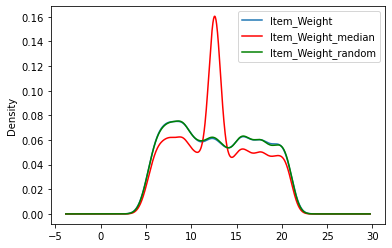

In [20]:
#Comparing Kde plot for different imputation technique
fig = plt.figure()
ax = fig.add_subplot(111)
dc['Item_Weight'].plot(kind='kde', ax=ax)
dc.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
dc.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [21]:
dc.drop(['Item_Weight', 'Item_Weight_median'],axis=1, inplace=True)

In [22]:
dt['Item_Weight']=dc['Item_Weight_random']

In [23]:
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [24]:
dt.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
df['Item_Weight']=dc['Item_Weight_random']

In [26]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [27]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,9.300,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,5.920,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,17.500,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,19.200,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,8.930,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,15.100,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,12.150,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.695,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,5.325,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [28]:
# finding correlation for all the dataset

In [29]:
dt.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015075,0.028131,-0.009605,0.016858
Item_Visibility,-0.015075,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.028131,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.009605,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.016858,-0.128625,0.567574,-0.049135,1.000000


In [30]:
e=dt.corr()
e['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.016858
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [31]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,0.002354,-0.011460,0.008259
Item_Visibility,0.002354,1.000000,-0.014013,-0.097040
Item_MRP,-0.011460,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.008259,-0.097040,-0.007233,1.000000


In [32]:
dc.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_random
Item_Visibility,1.000000,-0.006351,-0.083678,-0.128625,-0.014502
Item_MRP,-0.006351,1.000000,0.000141,0.567574,0.031367
Outlet_Establishment_Year,-0.083678,0.000141,1.000000,-0.049135,0.000188
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000,0.016858
Item_Weight_random,-0.014502,0.031367,0.000188,0.016858,1.000000


In [33]:
# finding description for all the dataset

In [34]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.863763,4.628500,4.555,8.840000,12.600000,16.750000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,5681.0,12.959086,4.644204,4.555,8.895000,12.800000,17.100000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [36]:
dc.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Item_Weight_random,14204.0,12.793561,4.640134,4.555,8.740000,12.600000,16.750000,21.350000


In [37]:
# pair plots for training data only

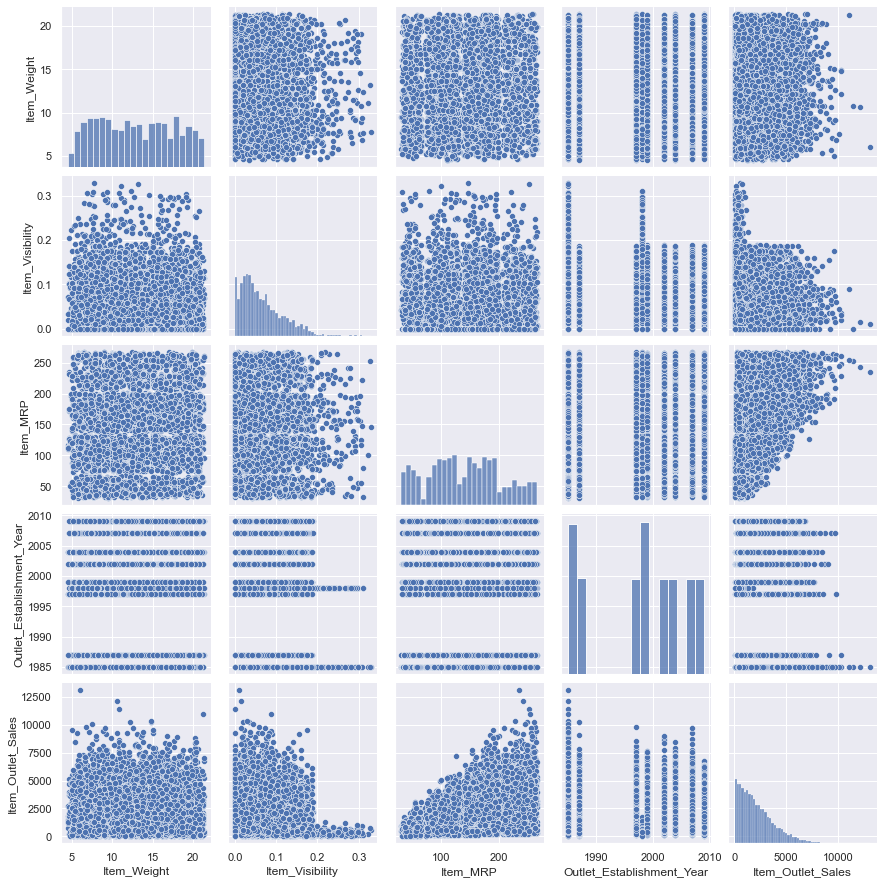

In [38]:
sns.set(font_scale=1)
sns.pairplot(dt)

<AxesSubplot:ylabel='Density'>

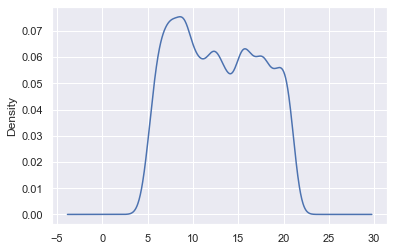

In [86]:
# Univarient analysis
# Item Identifier
dc['Item_Weight_random'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

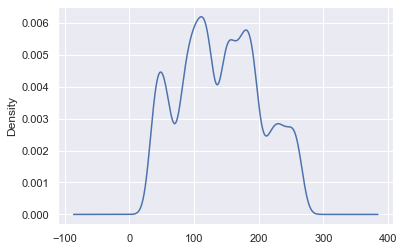

In [40]:
# Item_MRP
dc['Item_MRP'].plot(kind='kde')

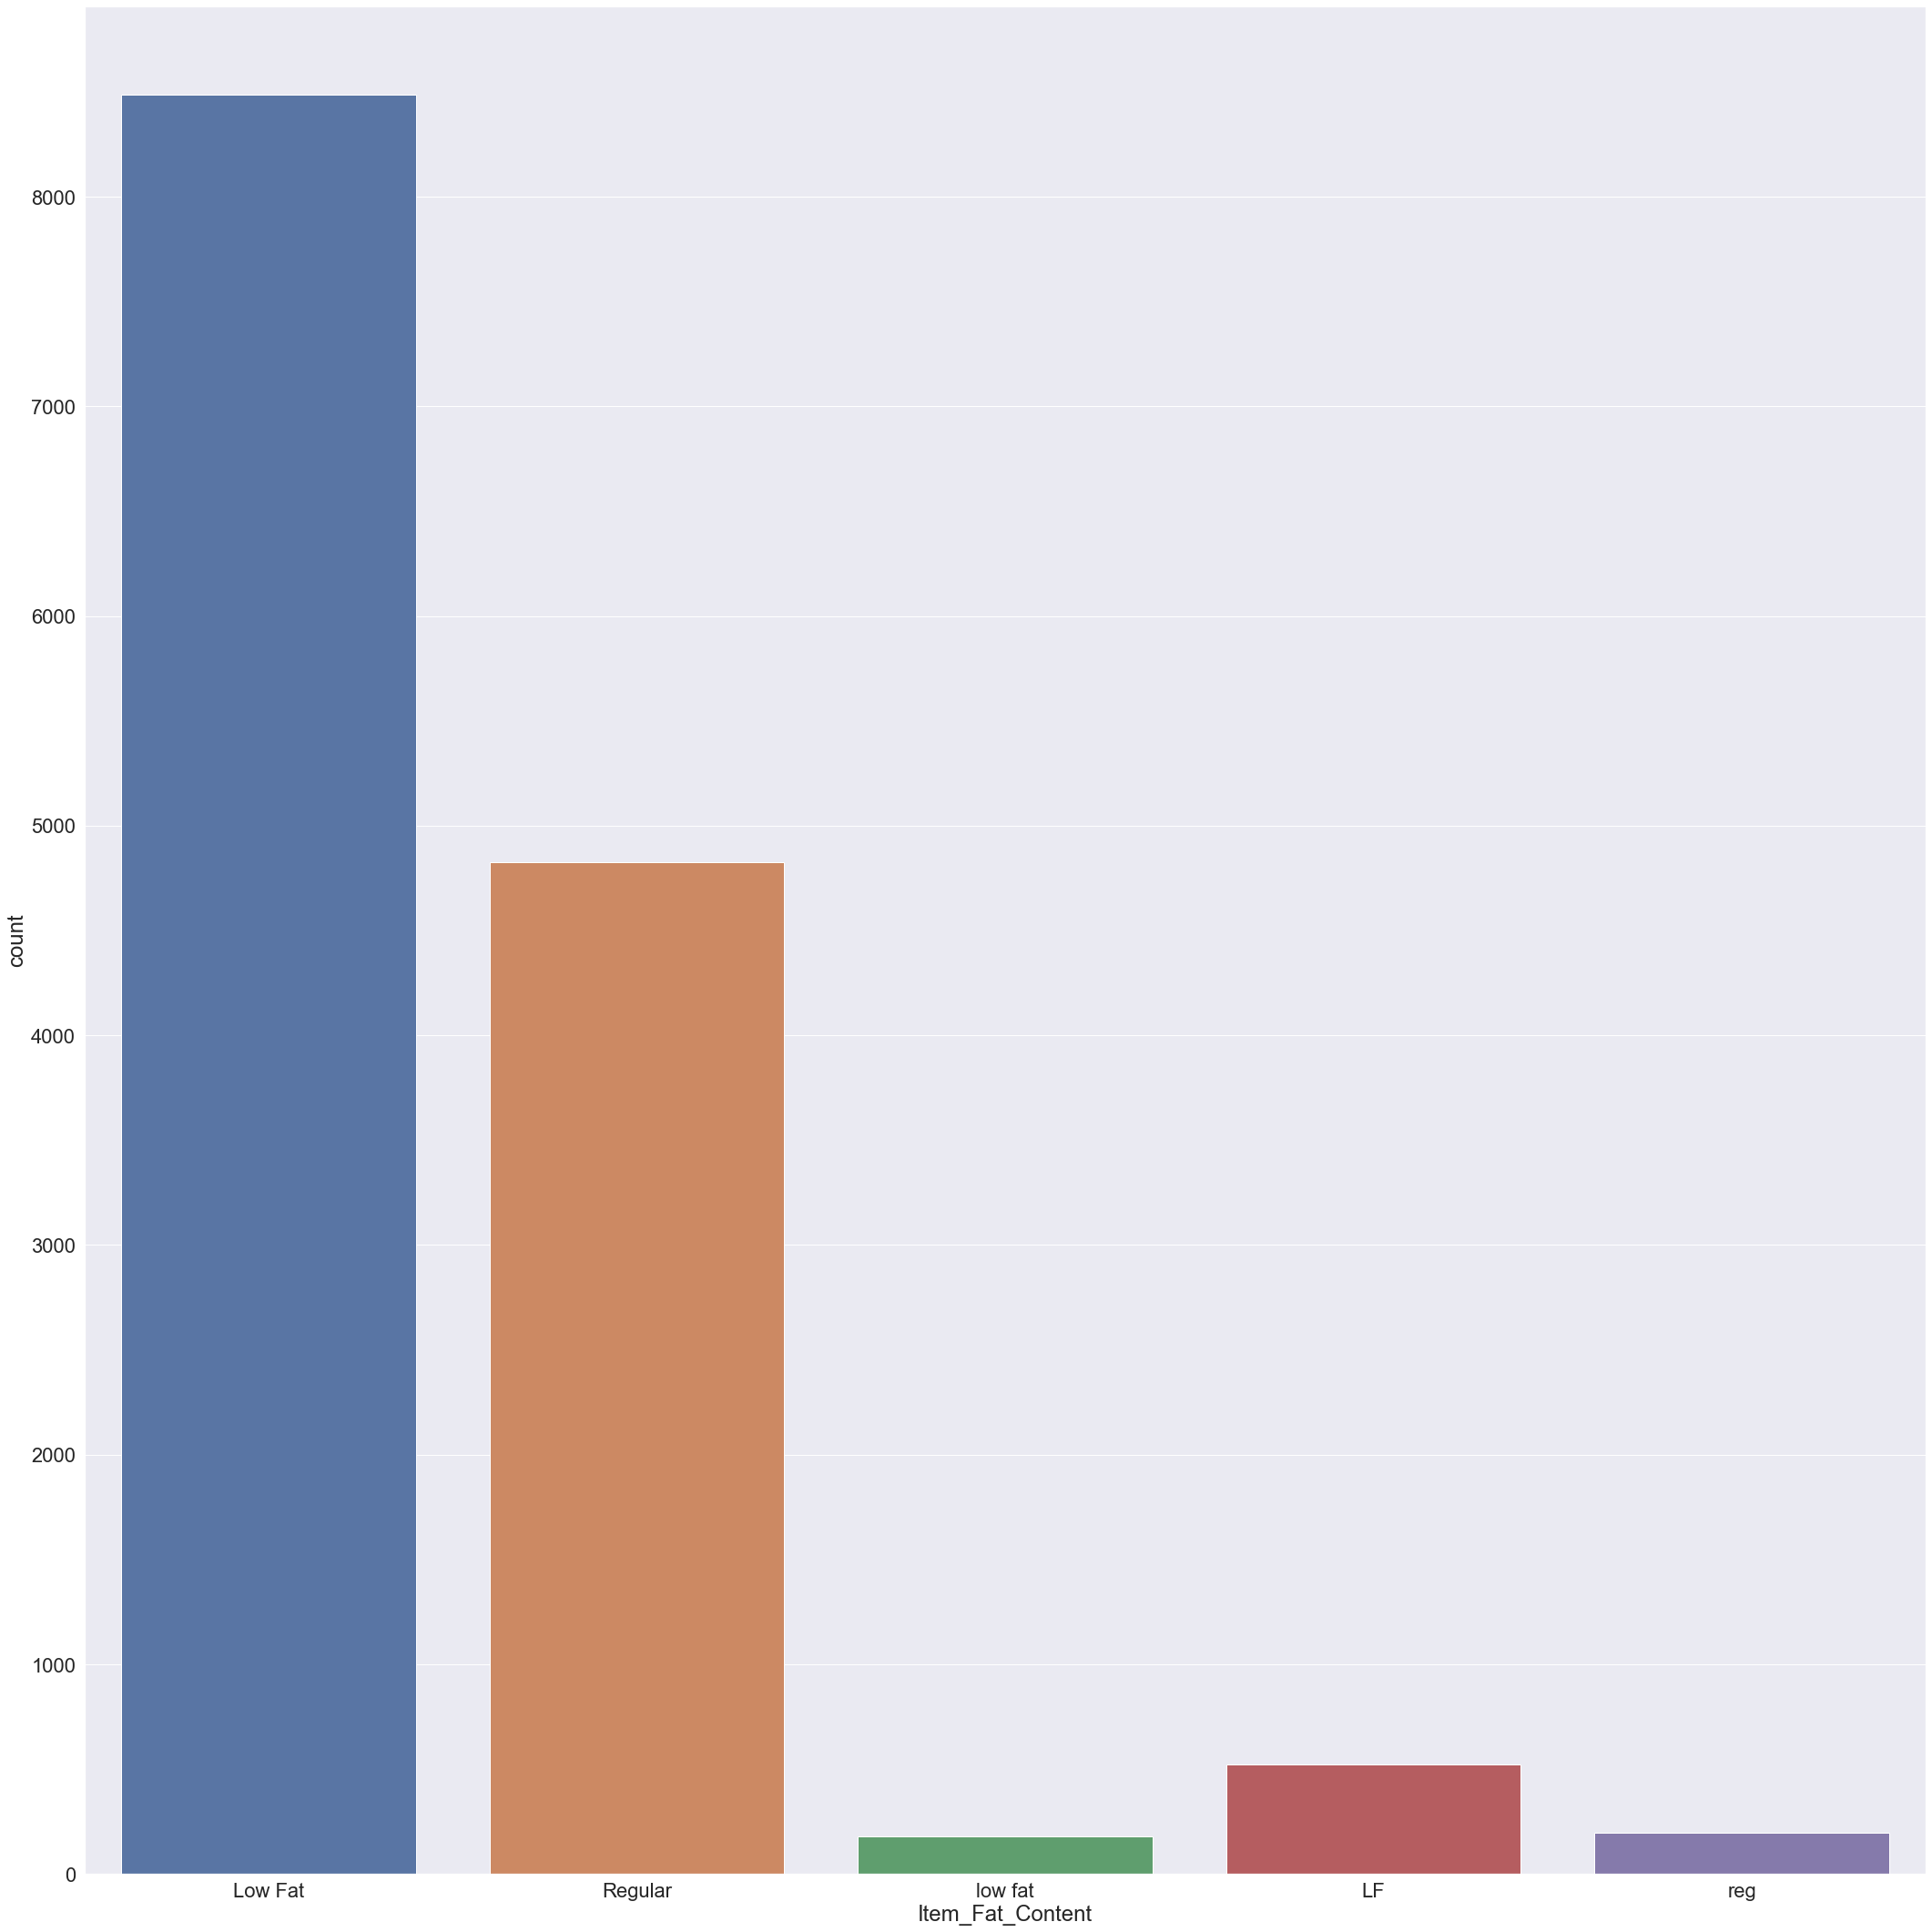

In [41]:
# Types of Item Fat Content
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(dc['Item_Fat_Content'])
plt. tight_layout()
plt.show()

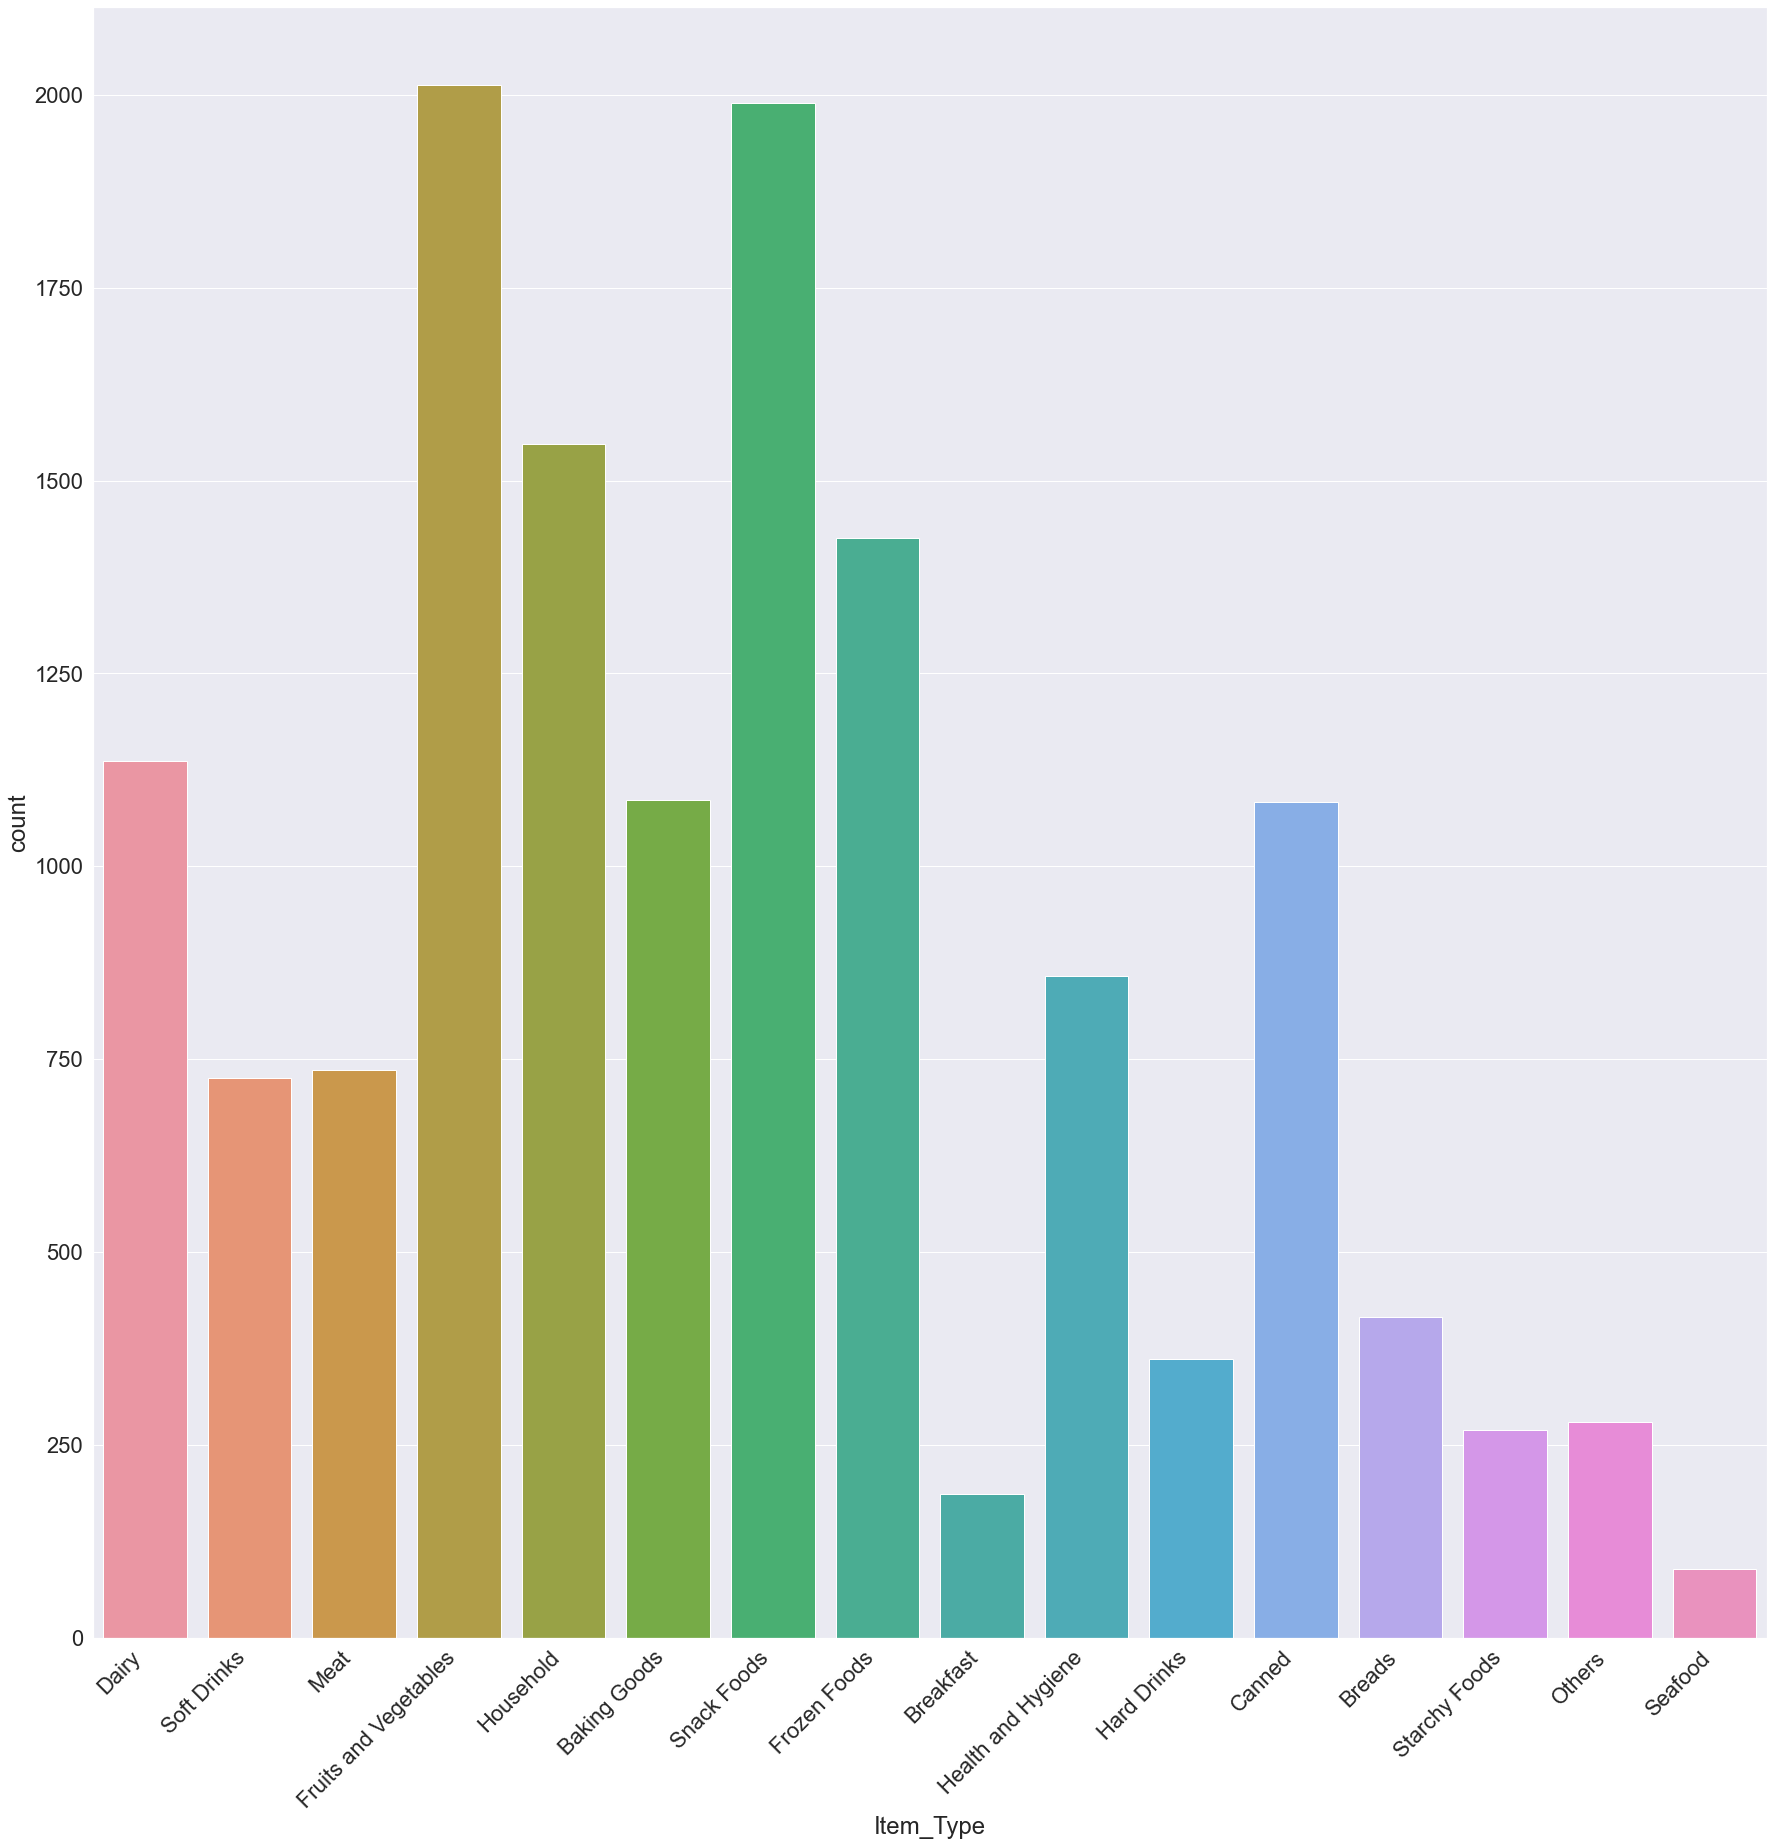

In [42]:
# Types of items
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(30,30))
chart =sns.countplot(x=dc['Item_Type'], orient='v',ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

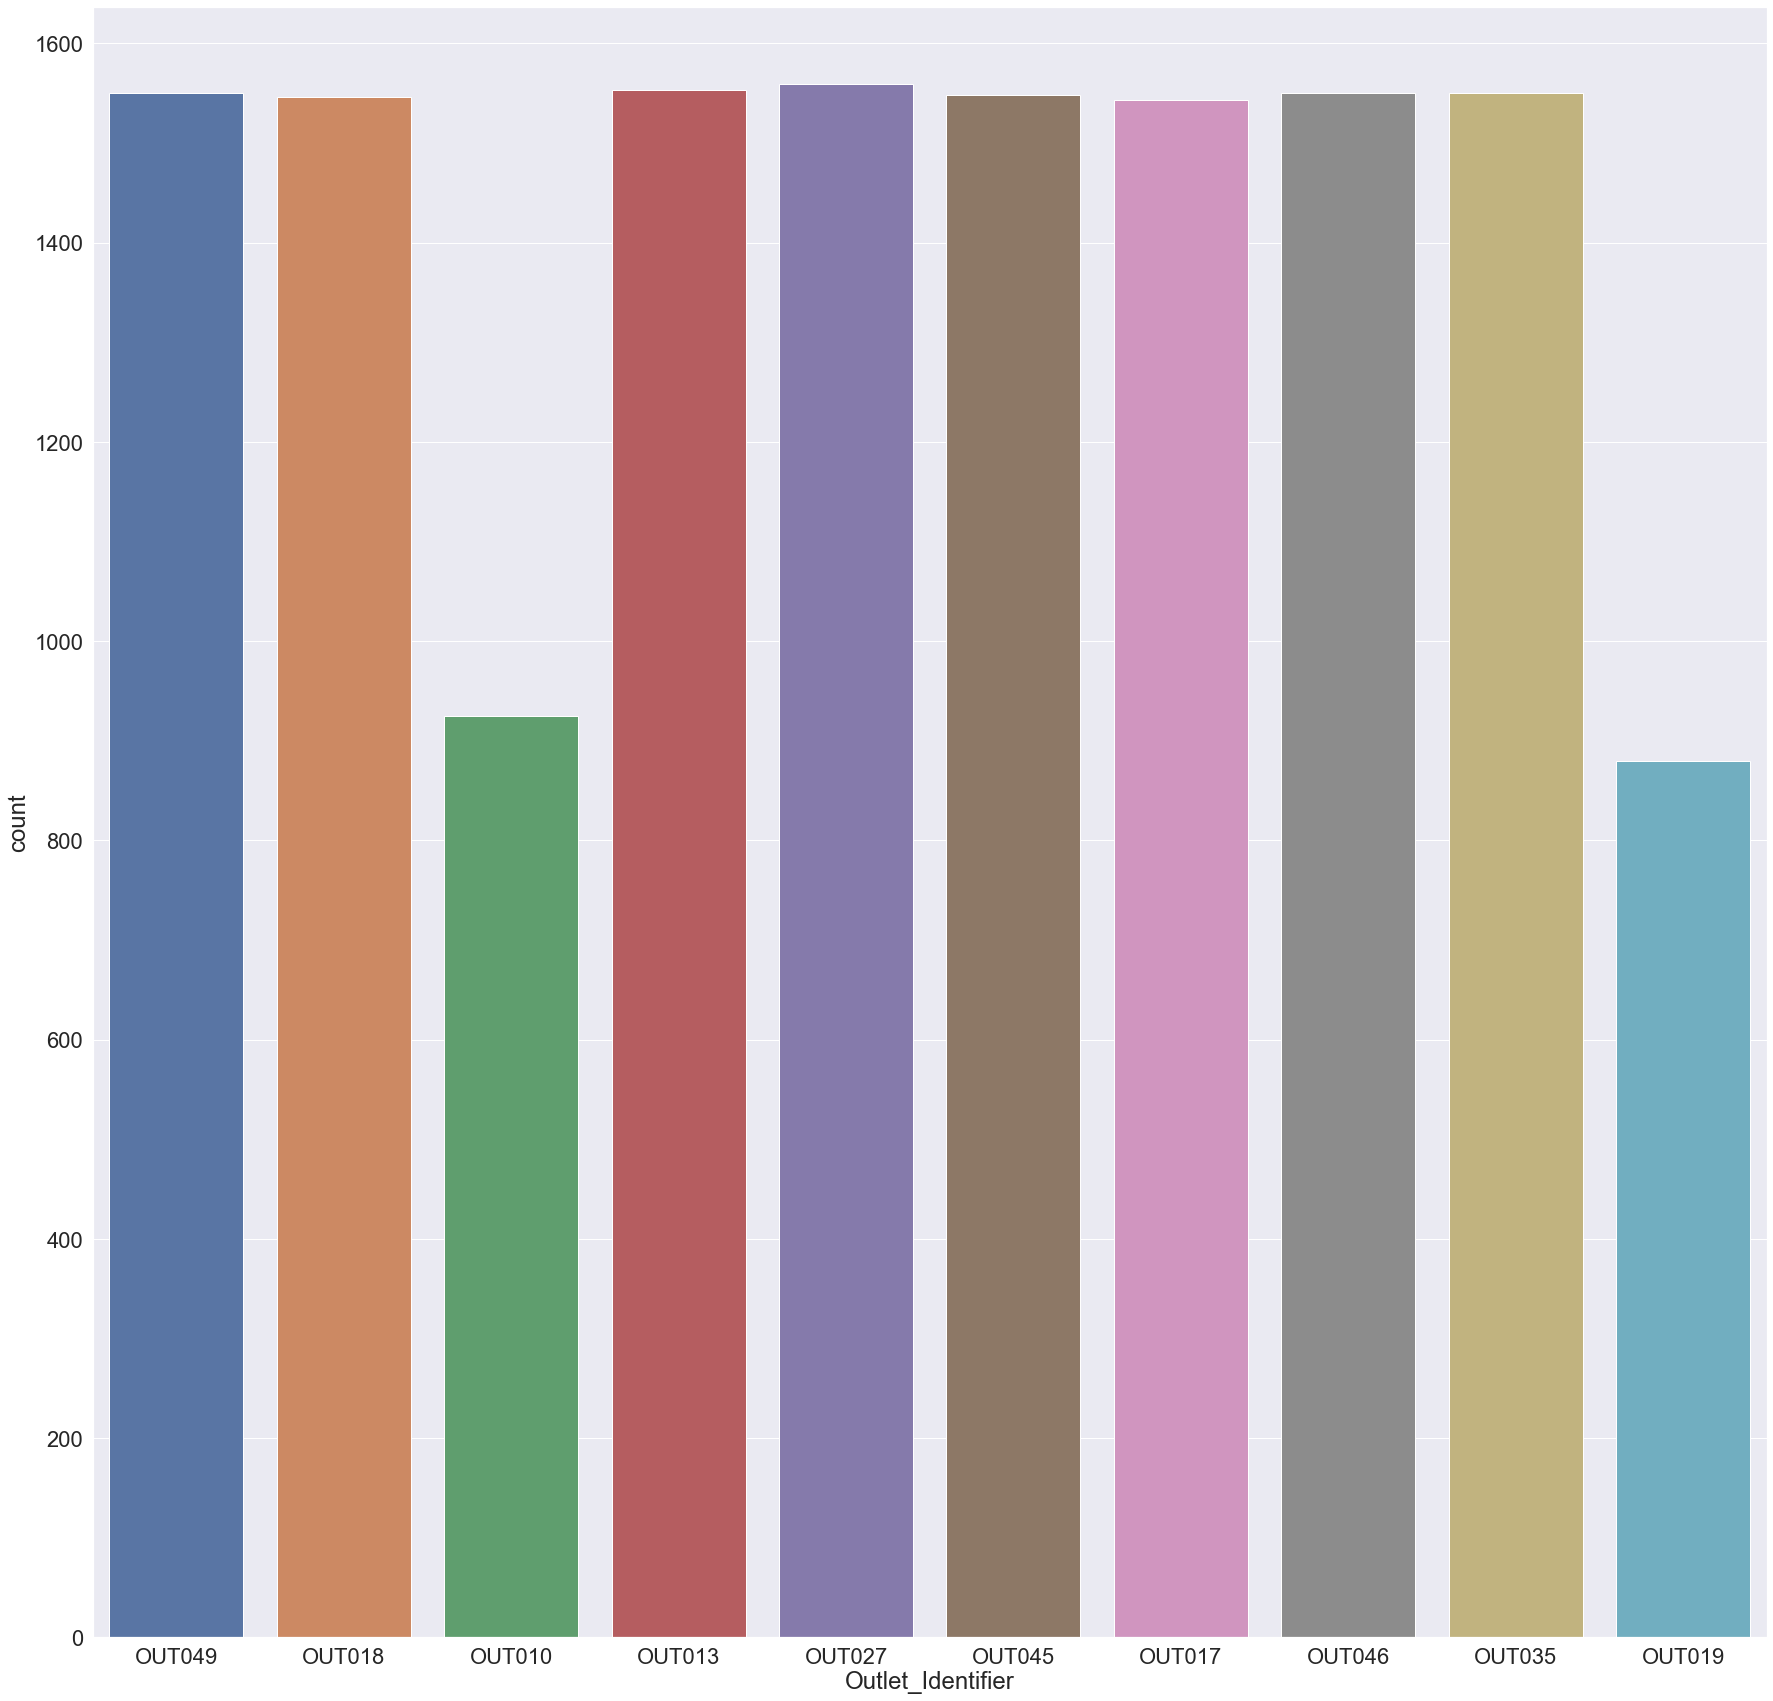

In [43]:
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(dc['Outlet_Identifier'], orient='h',ax=ax)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

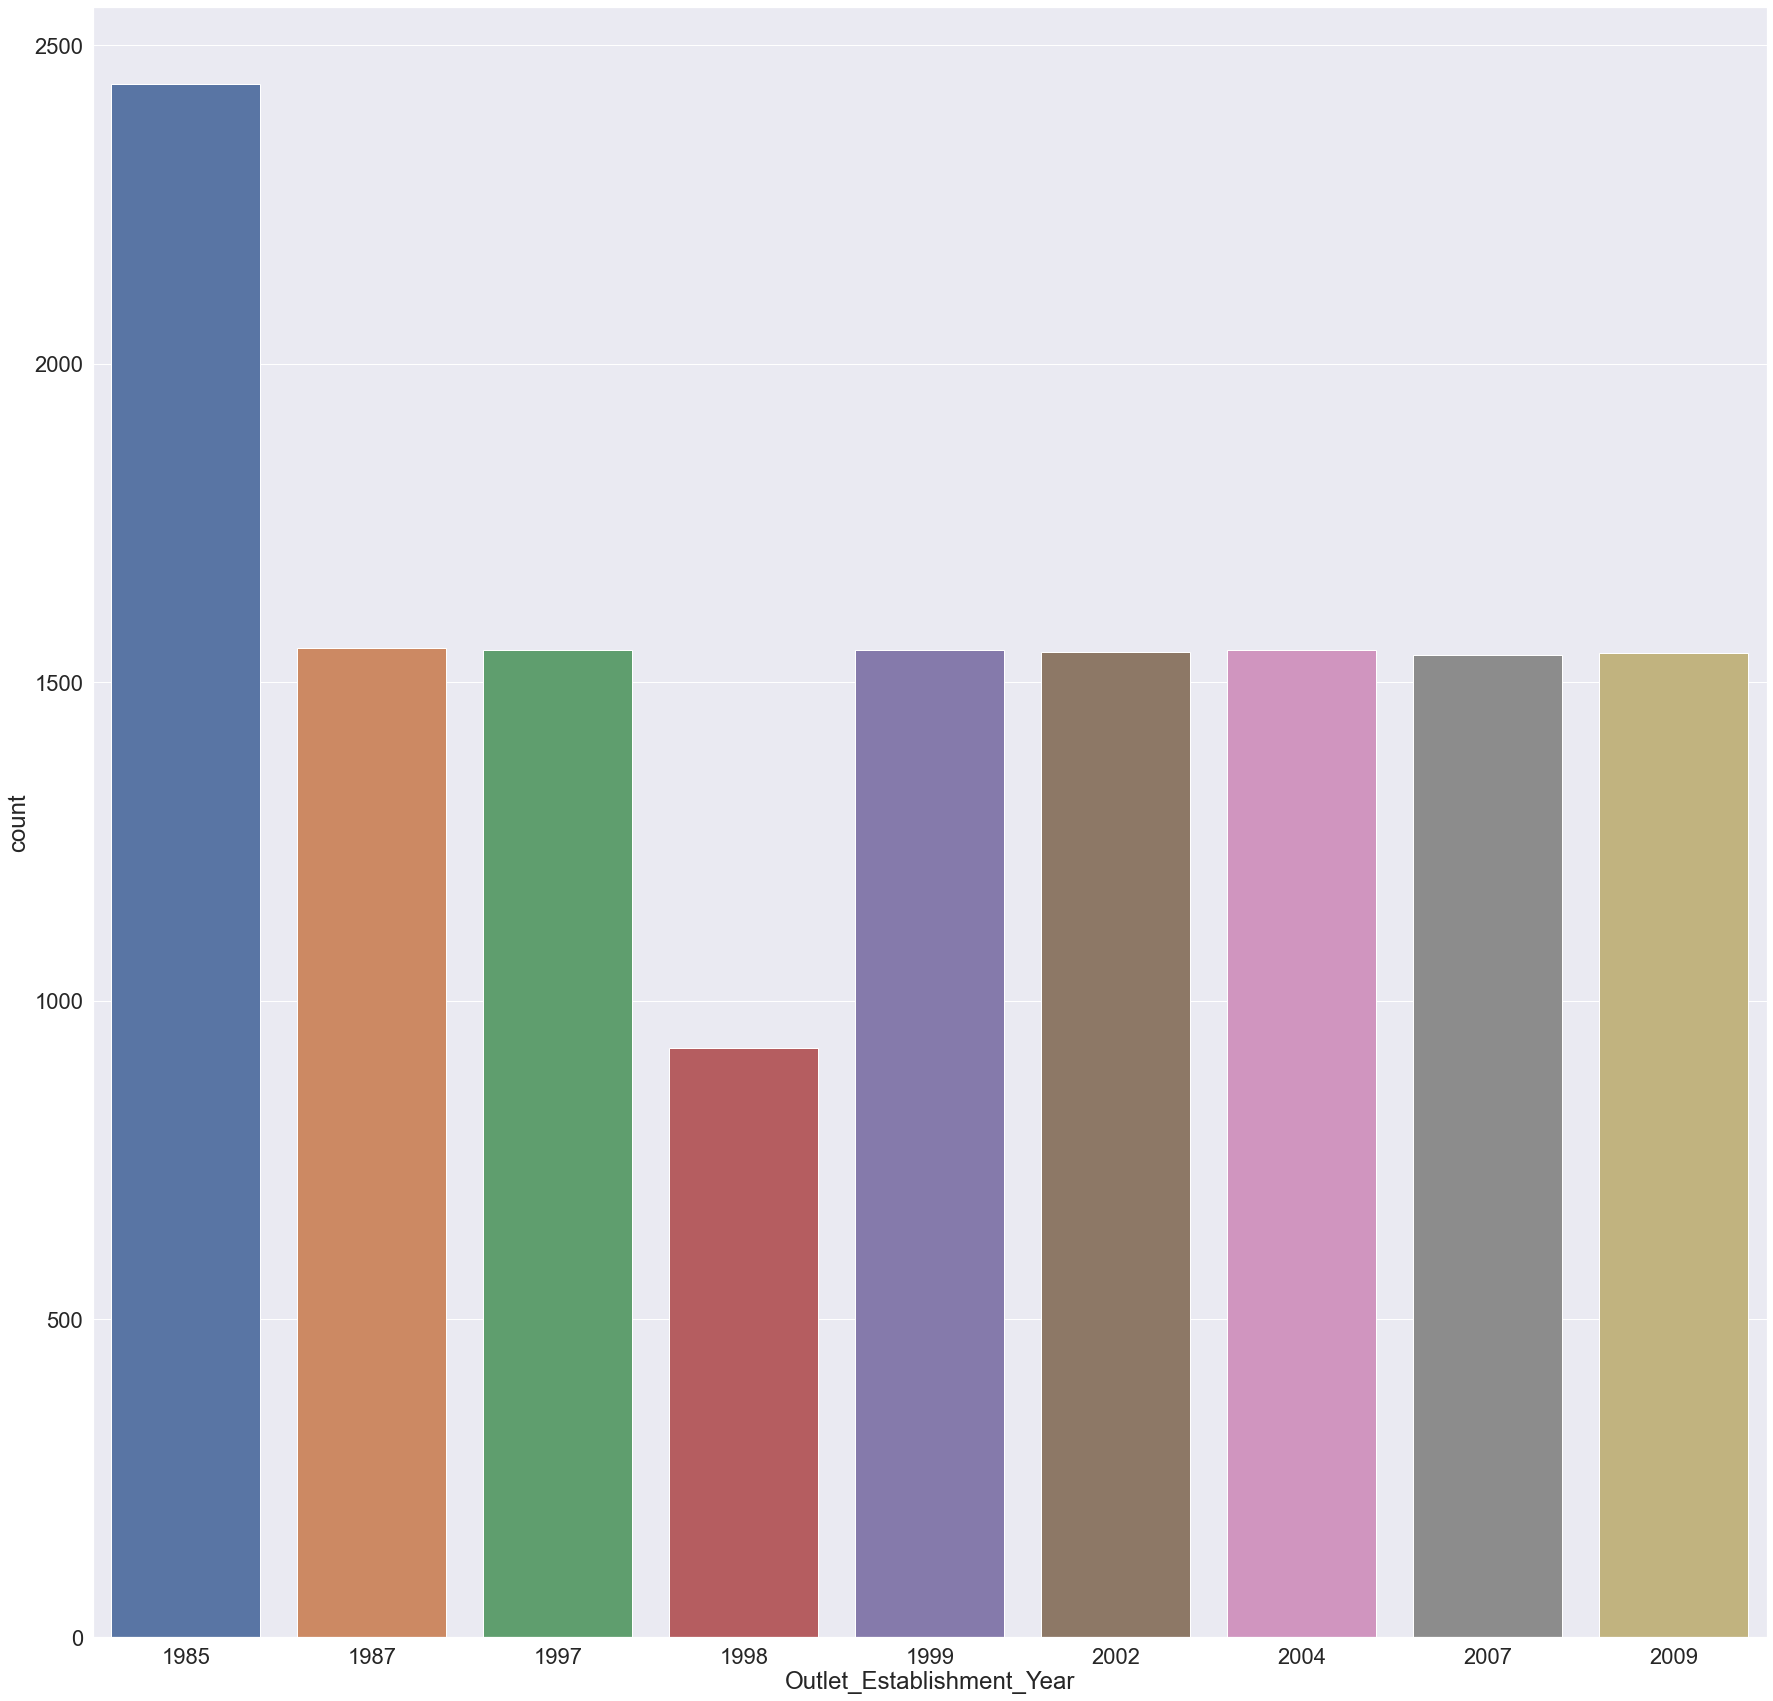

In [44]:
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(dc['Outlet_Establishment_Year'], orient='h',ax=ax)

We can infer the 1985 has biggest data

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

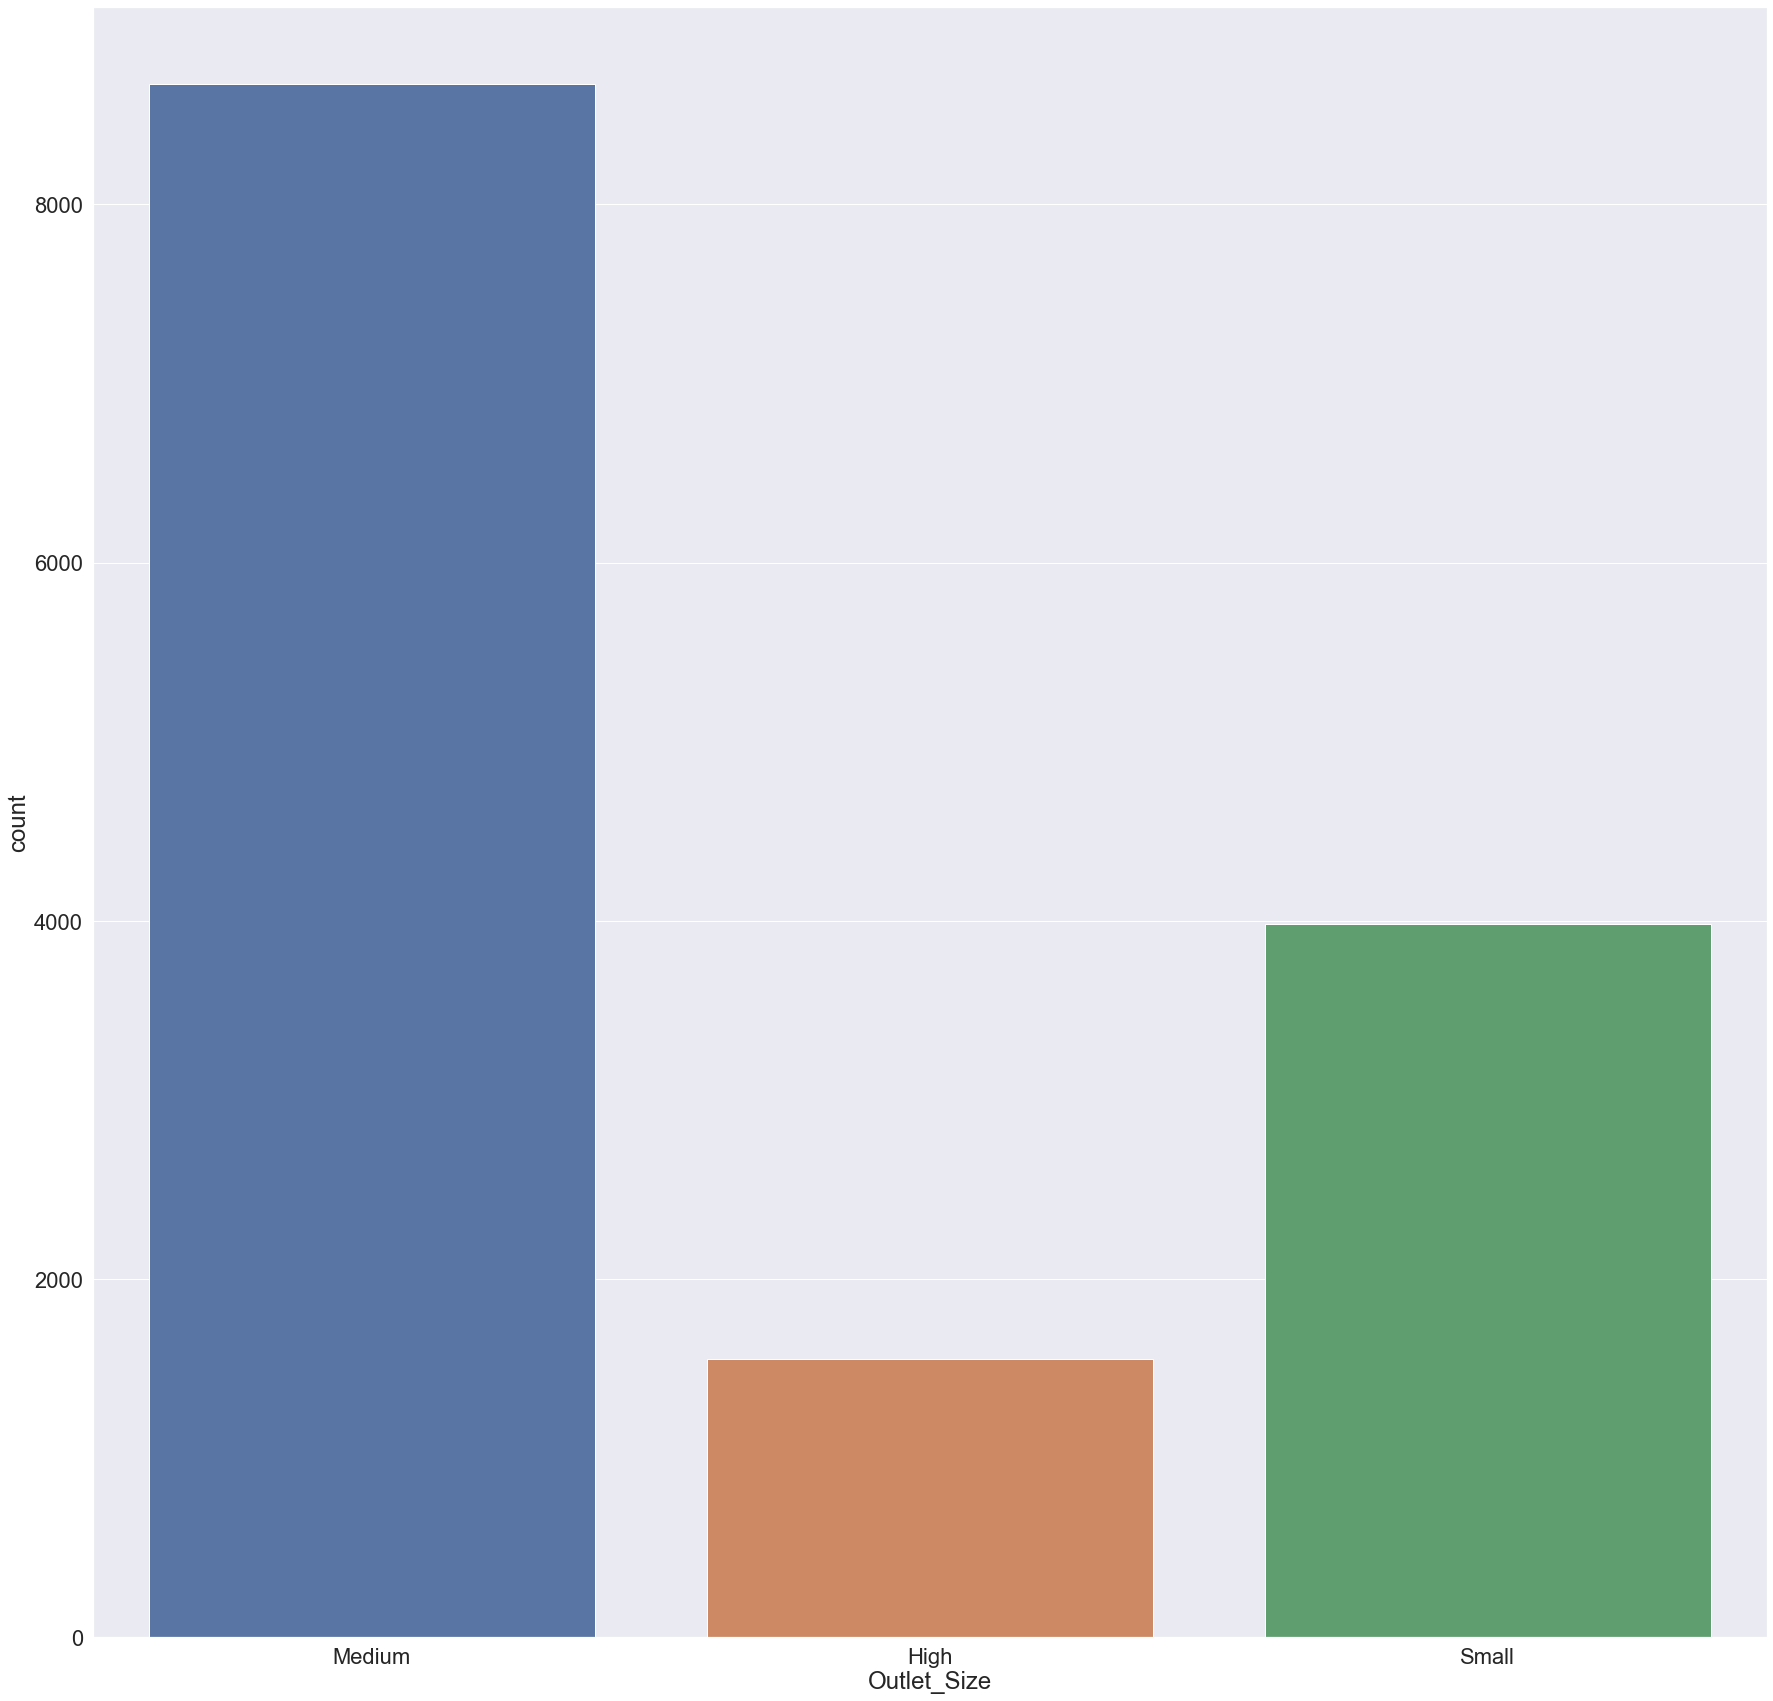

In [45]:
fig, ax = plt.subplots(figsize=(30,30))
sns.countplot(dc['Outlet_Size'], orient='h',ax=ax)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

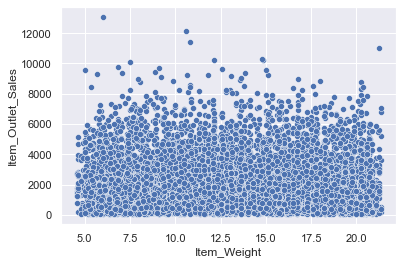

In [46]:
# For Bivarient analysis we have to take only trainning data dt
sns.set(font_scale=1)
sns.scatterplot(x=dt['Item_Weight'],y=dt['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

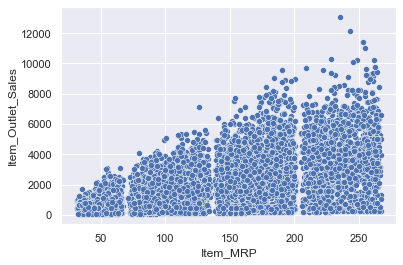

In [47]:
sns.scatterplot(x=dt['Item_MRP'],y=dt['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

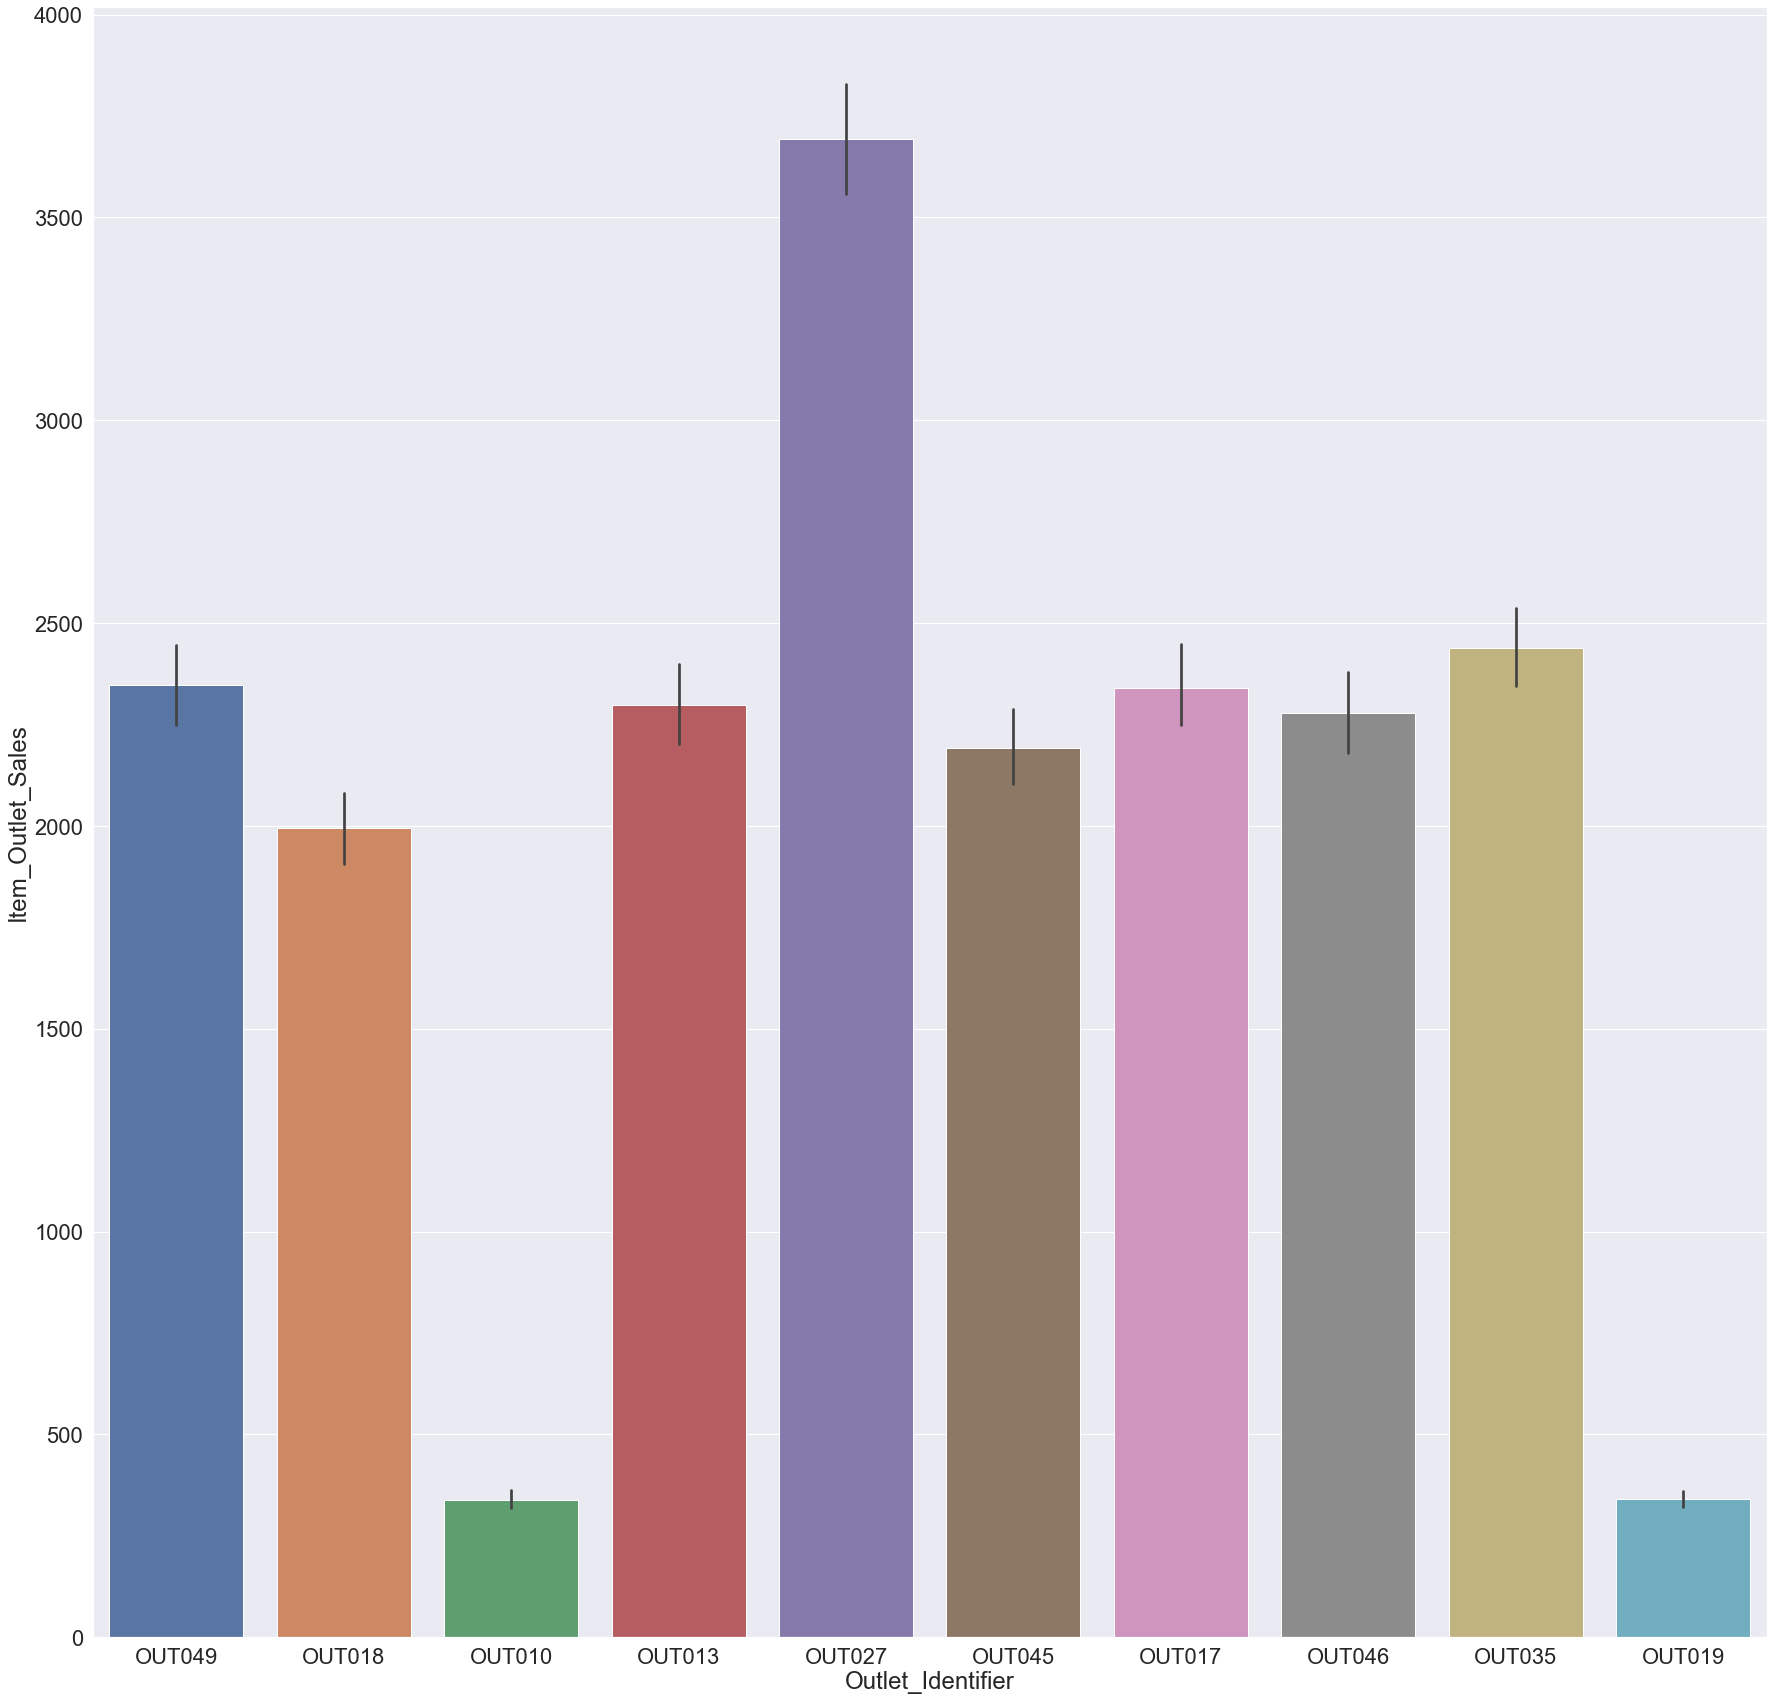

In [48]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(30,30))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales',data=dt)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

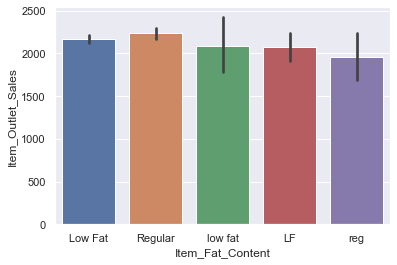

In [49]:
sns.set(font_scale=1)
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=dt)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

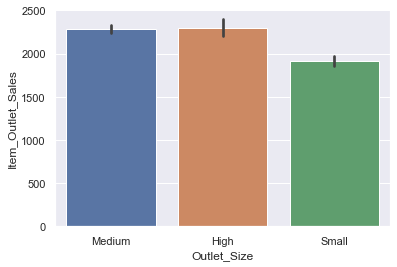

In [50]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=dt)

In [51]:
dt.drop(['Item_Identifier'], axis=1, inplace=True)

In [52]:
df.drop(['Item_Identifier'], axis=1, inplace=True)

In [53]:
# Encoding for machine learning models

In [54]:
dt['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [55]:
dt['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [56]:
dt['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [57]:
dt['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [58]:
dt['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [59]:
dt['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [60]:
dt['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat', 'reg':'Regular'},inplace=True)

In [61]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat', 'reg':'Regular'},inplace=True)

In [62]:
dt

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [63]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [64]:
# Assigning to a variable
le=LabelEncoder()

In [65]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['Item_Fat_Content']=le.fit_transform(dt['Item_Fat_Content'])

In [66]:
dt['Item_Type']=le.fit_transform(dt['Item_Type'])
dt['Outlet_Identifier']=le.fit_transform(dt['Outlet_Identifier'])
dt['Outlet_Size']=le.fit_transform(dt['Outlet_Size'])
dt['Outlet_Location_Type']=le.fit_transform(dt['Outlet_Location_Type'])
dt['Outlet_Type']=le.fit_transform(dt['Outlet_Type'])

In [67]:
# Coverting all the catagorical variables to numerical in testing dataset
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [68]:
# Splitting data for machine learning
X=dt.drop(labels='Item_Outlet_Sales',axis=1)
y=dt.Item_Outlet_Sales

In [69]:
# Standardization
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [70]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [75]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.04038318340738811
At random state, 1, the testing accuracy is :0.5097387444304208


At random state 2, the training accuracy is :0.0549030099104314
At random state, 2, the testing accuracy is :0.4949067716826391


At random state 3, the training accuracy is :0.006371107868071713
At random state, 3, the testing accuracy is :0.5440541037648925


At random state 4, the training accuracy is :0.04998498596001488
At random state, 4, the testing accuracy is :0.4982567241357505


At random state 5, the training accuracy is :0.048157668210965676
At random state, 5, the testing accuracy is :0.5020730941609854


At random state 6, the training accuracy is :0.041059963033318825
At random state, 6, the testing accuracy is :0.508925797603287


At random state 7, the training accuracy is :0.05512224586927339
At random state, 7, the testing accuracy is :0.49596690919948516


At random state 8, the training accuracy is :0.030525670556677653
At random state

In [76]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.921473171564247
At random state, 1, the testing accuracy is :0.5550816289630188


At random state 2, the training accuracy is :0.9202363358132387
At random state, 2, the testing accuracy is :0.5477254279030164


At random state 3, the training accuracy is :0.9173764505073482
At random state, 3, the testing accuracy is :0.5924549757311148


At random state 4, the training accuracy is :0.9218149995940738
At random state, 4, the testing accuracy is :0.5412487091181652


At random state 5, the training accuracy is :0.9205184527874672
At random state, 5, the testing accuracy is :0.5407811802298916


At random state 6, the training accuracy is :0.9216689284357162
At random state, 6, the testing accuracy is :0.5392833409792379


At random state 7, the training accuracy is :0.9220219693414788
At random state, 7, the testing accuracy is :0.5477979082922556


At random state 8, the training accuracy is :0.9194280276323353
At random state, 8, the tes

KeyboardInterrupt: 

In [74]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print('\n')

At random state 1, the training accuracy is :1.0
At random state, 1, the testing accuracy is :0.18080249297305673


At random state 2, the training accuracy is :1.0
At random state, 2, the testing accuracy is :0.22774539233786983


At random state 3, the training accuracy is :1.0
At random state, 3, the testing accuracy is :0.23751177311630978


At random state 4, the training accuracy is :1.0
At random state, 4, the testing accuracy is :0.09753060565486316


At random state 5, the training accuracy is :1.0
At random state, 5, the testing accuracy is :0.20489171339866752


At random state 6, the training accuracy is :1.0
At random state, 6, the testing accuracy is :0.15891016819234927


At random state 7, the training accuracy is :1.0
At random state, 7, the testing accuracy is :0.14962406873963685


At random state 8, the training accuracy is :1.0
At random state, 8, the testing accuracy is :0.27101086181461476


At random state 9, the training accuracy is :1.0
At random state, 9, the

In [77]:
U=df

In [78]:
# Standardization
scalar= StandardScaler()
X_scaled1=scalar.fit_transform(U)

In [79]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=979)
de=DecisionTreeRegressor()
de.fit(x_train, y_train)
predtrain=de.predict(x_train)
predtest=de.predict(x_test)
print(f"At random state, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, the training accuracy is :1.0
At random state, the testing accuracy is :0.08385170145732579


In [80]:
predtest1=de.predict(X_scaled1)

In [81]:
predtest1

array([ 994.7052, 1605.9096,  731.0484, ...,  942.7728, 6852.4136,
       1238.388 ])

In [83]:
d=pd.DataFrame(predtest1)

In [84]:
d

,0
0,994.7052
1,1605.9096
2,731.0484
3,1677.1502
4,9133.4444
...,...
5676,2681.8424
5677,3238.4512
5678,942.7728
5679,6852.4136
